<a href="https://colab.research.google.com/github/sheraphineshovan/Capstone_Projects/blob/main/PIMA_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and dataset

Here, I am going to analyse the PIMA Indian diabetes dataset

About Dataset:

     *   Pregnancies: This column provides information about the no.of pregnancies carried out by the patient

     *   Glucose: This column provides information about the glucose level of the patient

     *   BloodPressure: This column provides information about the blood pressure of the patient

     *   SkinThickness: This column provides information about the skin SkinThickness of the patient

     *   Insulin: This column provides informaton about the Insulin level of the patient
     
     *   BMI: This column provides information about the BMI of the patient
     
     *   DiabetesPedigreeFunction: This column provides information about the Diabetes Pedigree Function of the patient
      
     *   Age: This column contians information about the age of the patient
     
     *   Outcome: This column provides information that whether the patient has diabetes or not(0-No Diabetes,1-Diabetes)

Problem Statement:
    
   *  The problem statement for diabetes prediction is to develop a machine
learning algorithm that can predict the likelihood of an individual developing diabetes based on their demographic, lifestyle, and clinical characteristics, using a dataset of historical patient data.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data = pd.read_csv('/content/PIMA Indian diabetes dataset.csv')

# Exploratory Data Analysis

In [ ]:
data.info()
# Getting information about the data
# all columns are int or float, so no need to encode the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()
# to obtain some additional features we are using this code
# we are having min value as '0' for max columns which is not possible we have to replace it with mean
# this data contains outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dff = data.drop(["Outcome", "Pregnancies"], axis=1)
# droping this 2 columns because practically it can have '0' as a value

In [ ]:
dff = dff.replace(0, np.NAN)
# replacing '0' as a null value

In [ ]:
dff.isna().sum()
#checking the count of null values

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
df = pd.concat([dff, data["Pregnancies"], data["Outcome"]], axis=1)
# joining the dataset

In [ ]:
df.isna().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Pregnancies                   0
Outcome                       0
dtype: int64

In [ ]:
for i in df.columns:
    df[i] = df[i].fillna(df.groupby("Outcome")[i].transform("mean"))
# replacing the null values with the mean value

In [ ]:
df.isna().sum()
# checking the null values
# successfully replaced the null values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Pregnancies                 0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()
# there is no duplicate values in the dataset

0

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Removing Outliers

In [ ]:
df.skew()
# some variables are hugely skewed which indicates outliers

Glucose                     0.530932
BloodPressure               0.131514
SkinThickness               0.761818
Insulin                     2.622728
BMI                         0.602144
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
Outcome                     0.635017
dtype: float64

In [ ]:
# user define function to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

<Axes: >

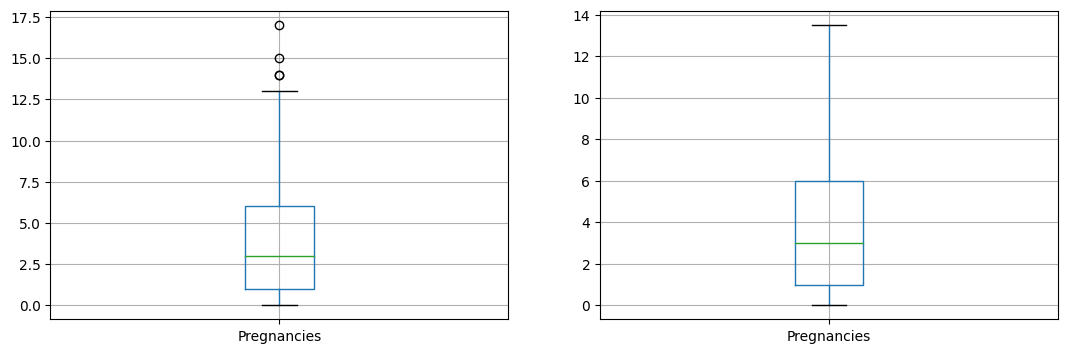

In [ ]:
# removing outliers from 'Pregnancies' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('Pregnancies',ax=ax1)
low_Pregnancies,high_Pregnancies=remove_outlier(df['Pregnancies'])
df['Pregnancies']=np.where(df['Pregnancies']>high_Pregnancies,high_Pregnancies,df['Pregnancies'])
df['Pregnancies']=np.where(df['Pregnancies']<low_Pregnancies,low_Pregnancies,df['Pregnancies'])
df.boxplot('Pregnancies',ax=ax2)

<Axes: >

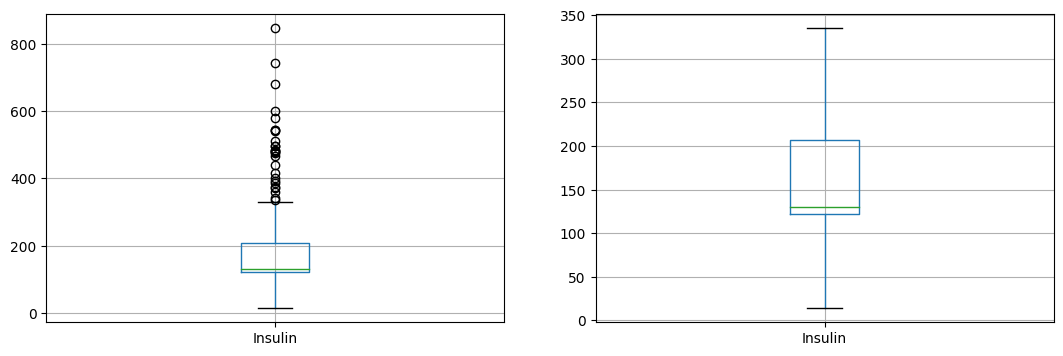

In [ ]:
# removing outliers from 'Insulin' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('Insulin',ax=ax1)
low_Insulin,high_Insulin=remove_outlier(df['Insulin'])
df['Insulin']=np.where(df['Insulin']>high_Insulin,high_Insulin,df['Insulin'])
df['Insulin']=np.where(df['Insulin']<low_Insulin,low_Insulin,df['Insulin'])
df.boxplot('Insulin',ax=ax2)

<Axes: >

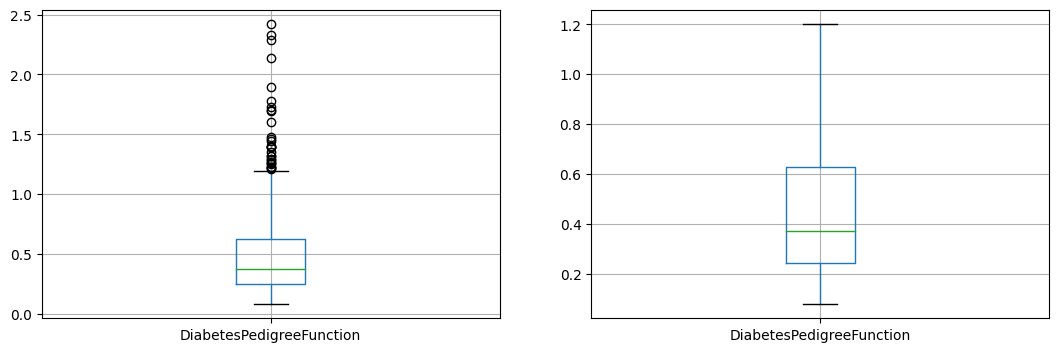

In [ ]:
# removing outliers from 'DiabetesPedigreeFunction' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('DiabetesPedigreeFunction',ax=ax1)
low_DiabetesPedigreeFunction,high_DiabetesPedigreeFunction=remove_outlier(df['DiabetesPedigreeFunction'])
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction']>high_DiabetesPedigreeFunction,high_DiabetesPedigreeFunction,df['DiabetesPedigreeFunction'])
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction']<low_DiabetesPedigreeFunction,low_DiabetesPedigreeFunction,df['DiabetesPedigreeFunction'])
df.boxplot('DiabetesPedigreeFunction',ax=ax2)

<Axes: >

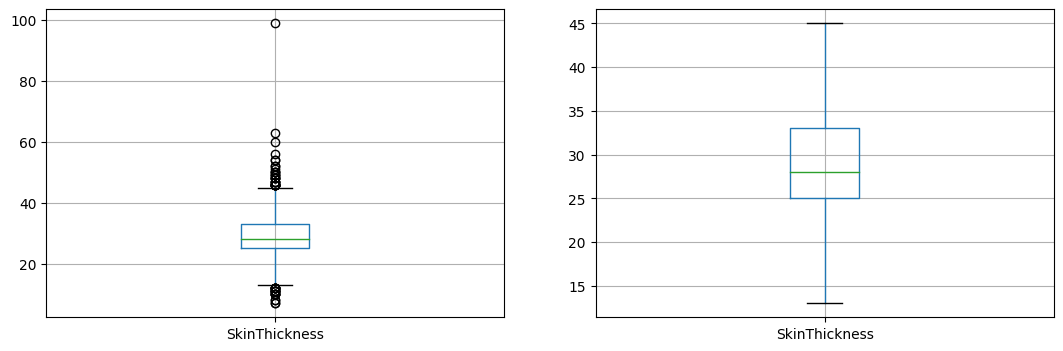

In [ ]:
# removing outliers from 'SkinThickness' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('SkinThickness',ax=ax1)
low_SkinThickness,high_SkinThickness=remove_outlier(df['SkinThickness'])
df['SkinThickness']=np.where(df['SkinThickness']>high_SkinThickness,high_SkinThickness,df['SkinThickness'])
df['SkinThickness']=np.where(df['SkinThickness']<low_SkinThickness,low_SkinThickness,df['SkinThickness'])
df.boxplot('SkinThickness',ax=ax2)

<Axes: >

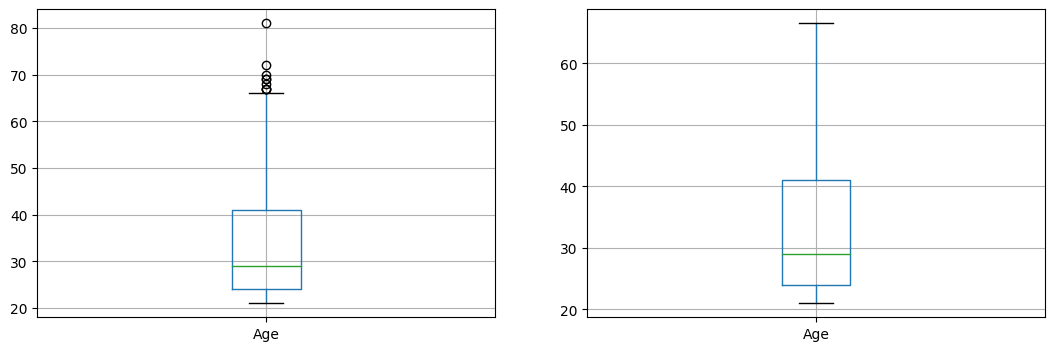

In [ ]:
# removing outliers from 'Age' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('Age',ax=ax1)
low_Age,high_Age=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>high_Age,high_Age,df['Age'])
df['Age']=np.where(df['Age']<low_Age,low_Age,df['Age'])
df.boxplot('Age',ax=ax2)

<Axes: >

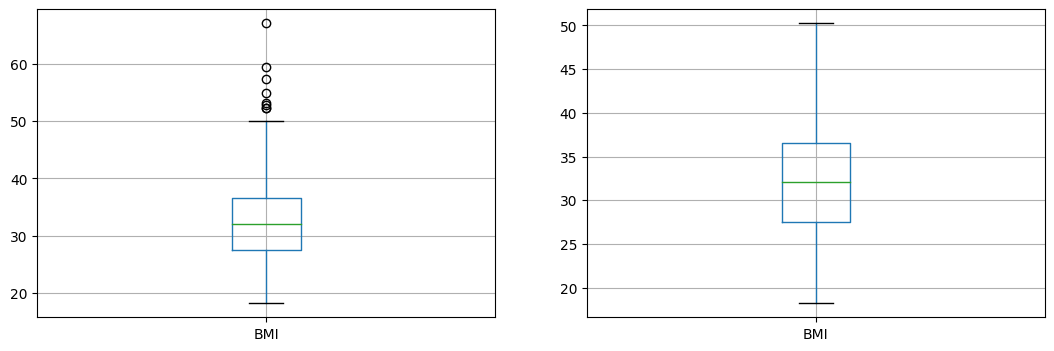

In [ ]:
# removing outliers from 'BMI' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('BMI',ax=ax1)
low_BMI,high_BMI=remove_outlier(df['BMI'])
df['BMI']=np.where(df['BMI']>high_BMI,high_BMI,df['BMI'])
df['BMI']=np.where(df['BMI']<low_BMI,low_BMI,df['BMI'])
df.boxplot('BMI',ax=ax2)

<Axes: >

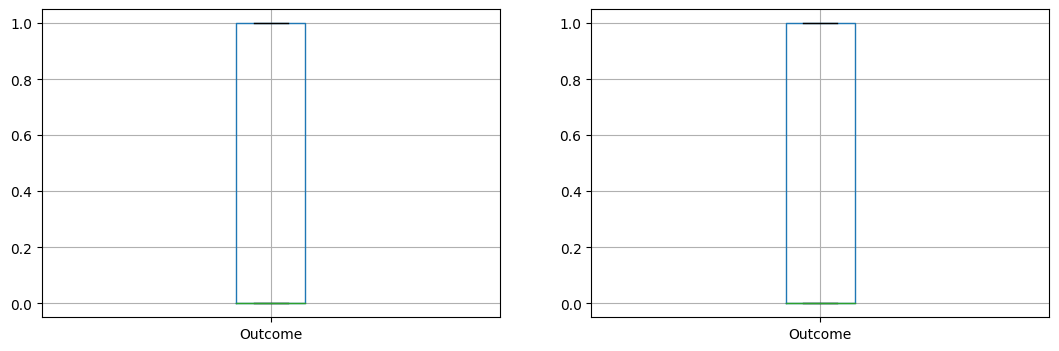

In [ ]:
# removing outliers from 'Outcome' column
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,4))
df.boxplot('Outcome',ax=ax1)
low_Outcome,high_Outcome=remove_outlier(df['Outcome'])
df['Outcome']=np.where(df['Outcome']>high_Outcome,high_Outcome,df['Outcome'])
df['Outcome']=np.where(df['Outcome']<low_Outcome,low_Outcome,df['Outcome'])
df.boxplot('Outcome',ax=ax2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


# Data Visualization

<Axes: xlabel='Glucose', ylabel='Count'>

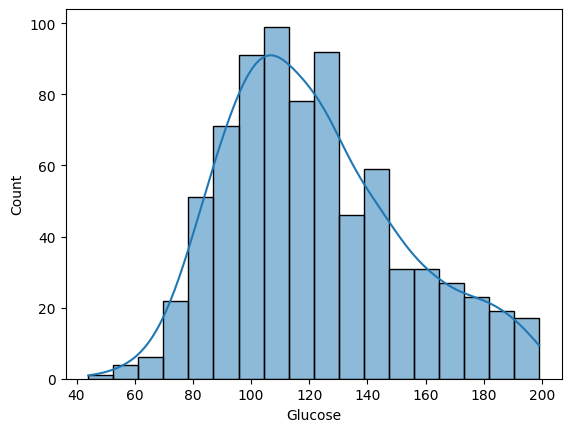

In [ ]:
sns.histplot(df['Glucose'],kde=True)
# Glucose data is normally distributed

<Axes: xlabel='BloodPressure', ylabel='Count'>

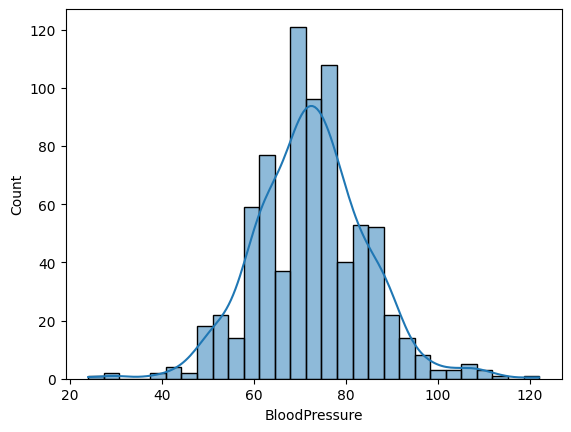

In [ ]:
sns.histplot(df['BloodPressure'],kde=True)
# BloodPressure data is normallly distributed

<Axes: xlabel='BMI', ylabel='Count'>

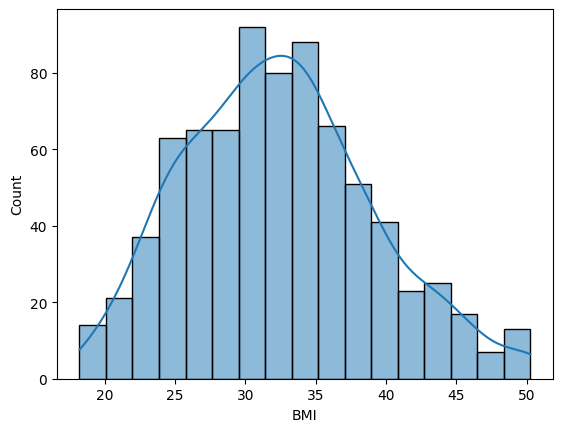

In [ ]:
sns.histplot(df['BMI'],kde=True)
# BMI is also normally distributed

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

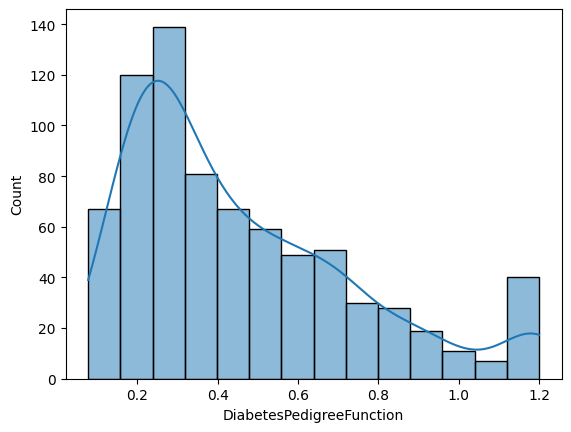

In [ ]:
sns.histplot(df['DiabetesPedigreeFunction'],kde=True)
# this data is right skewed

<Axes: xlabel='Age', ylabel='Count'>

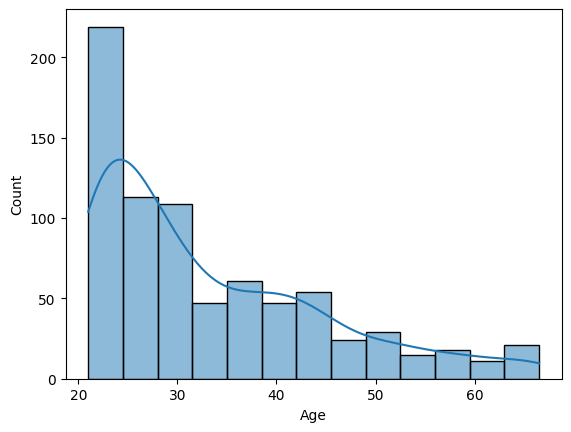

In [ ]:
sns.histplot(df['Age'],kde=True)
#  age column is right skewed

<Axes: xlabel='Pregnancies', ylabel='Count'>

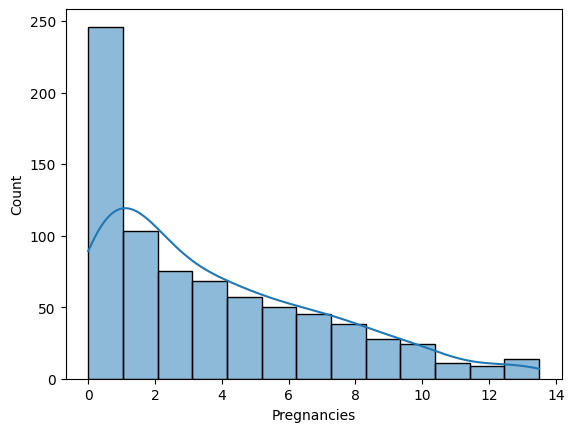

In [ ]:
sns.histplot(df['Pregnancies'],kde=True)
# this pregnancy data is also right skewed

<Axes: ylabel='Outcome'>

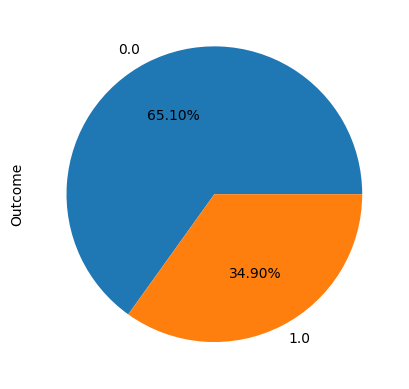

In [ ]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%1.2f%%')
# no of patients havinhg diabetes is about 35% and not having diabetes is about 65%

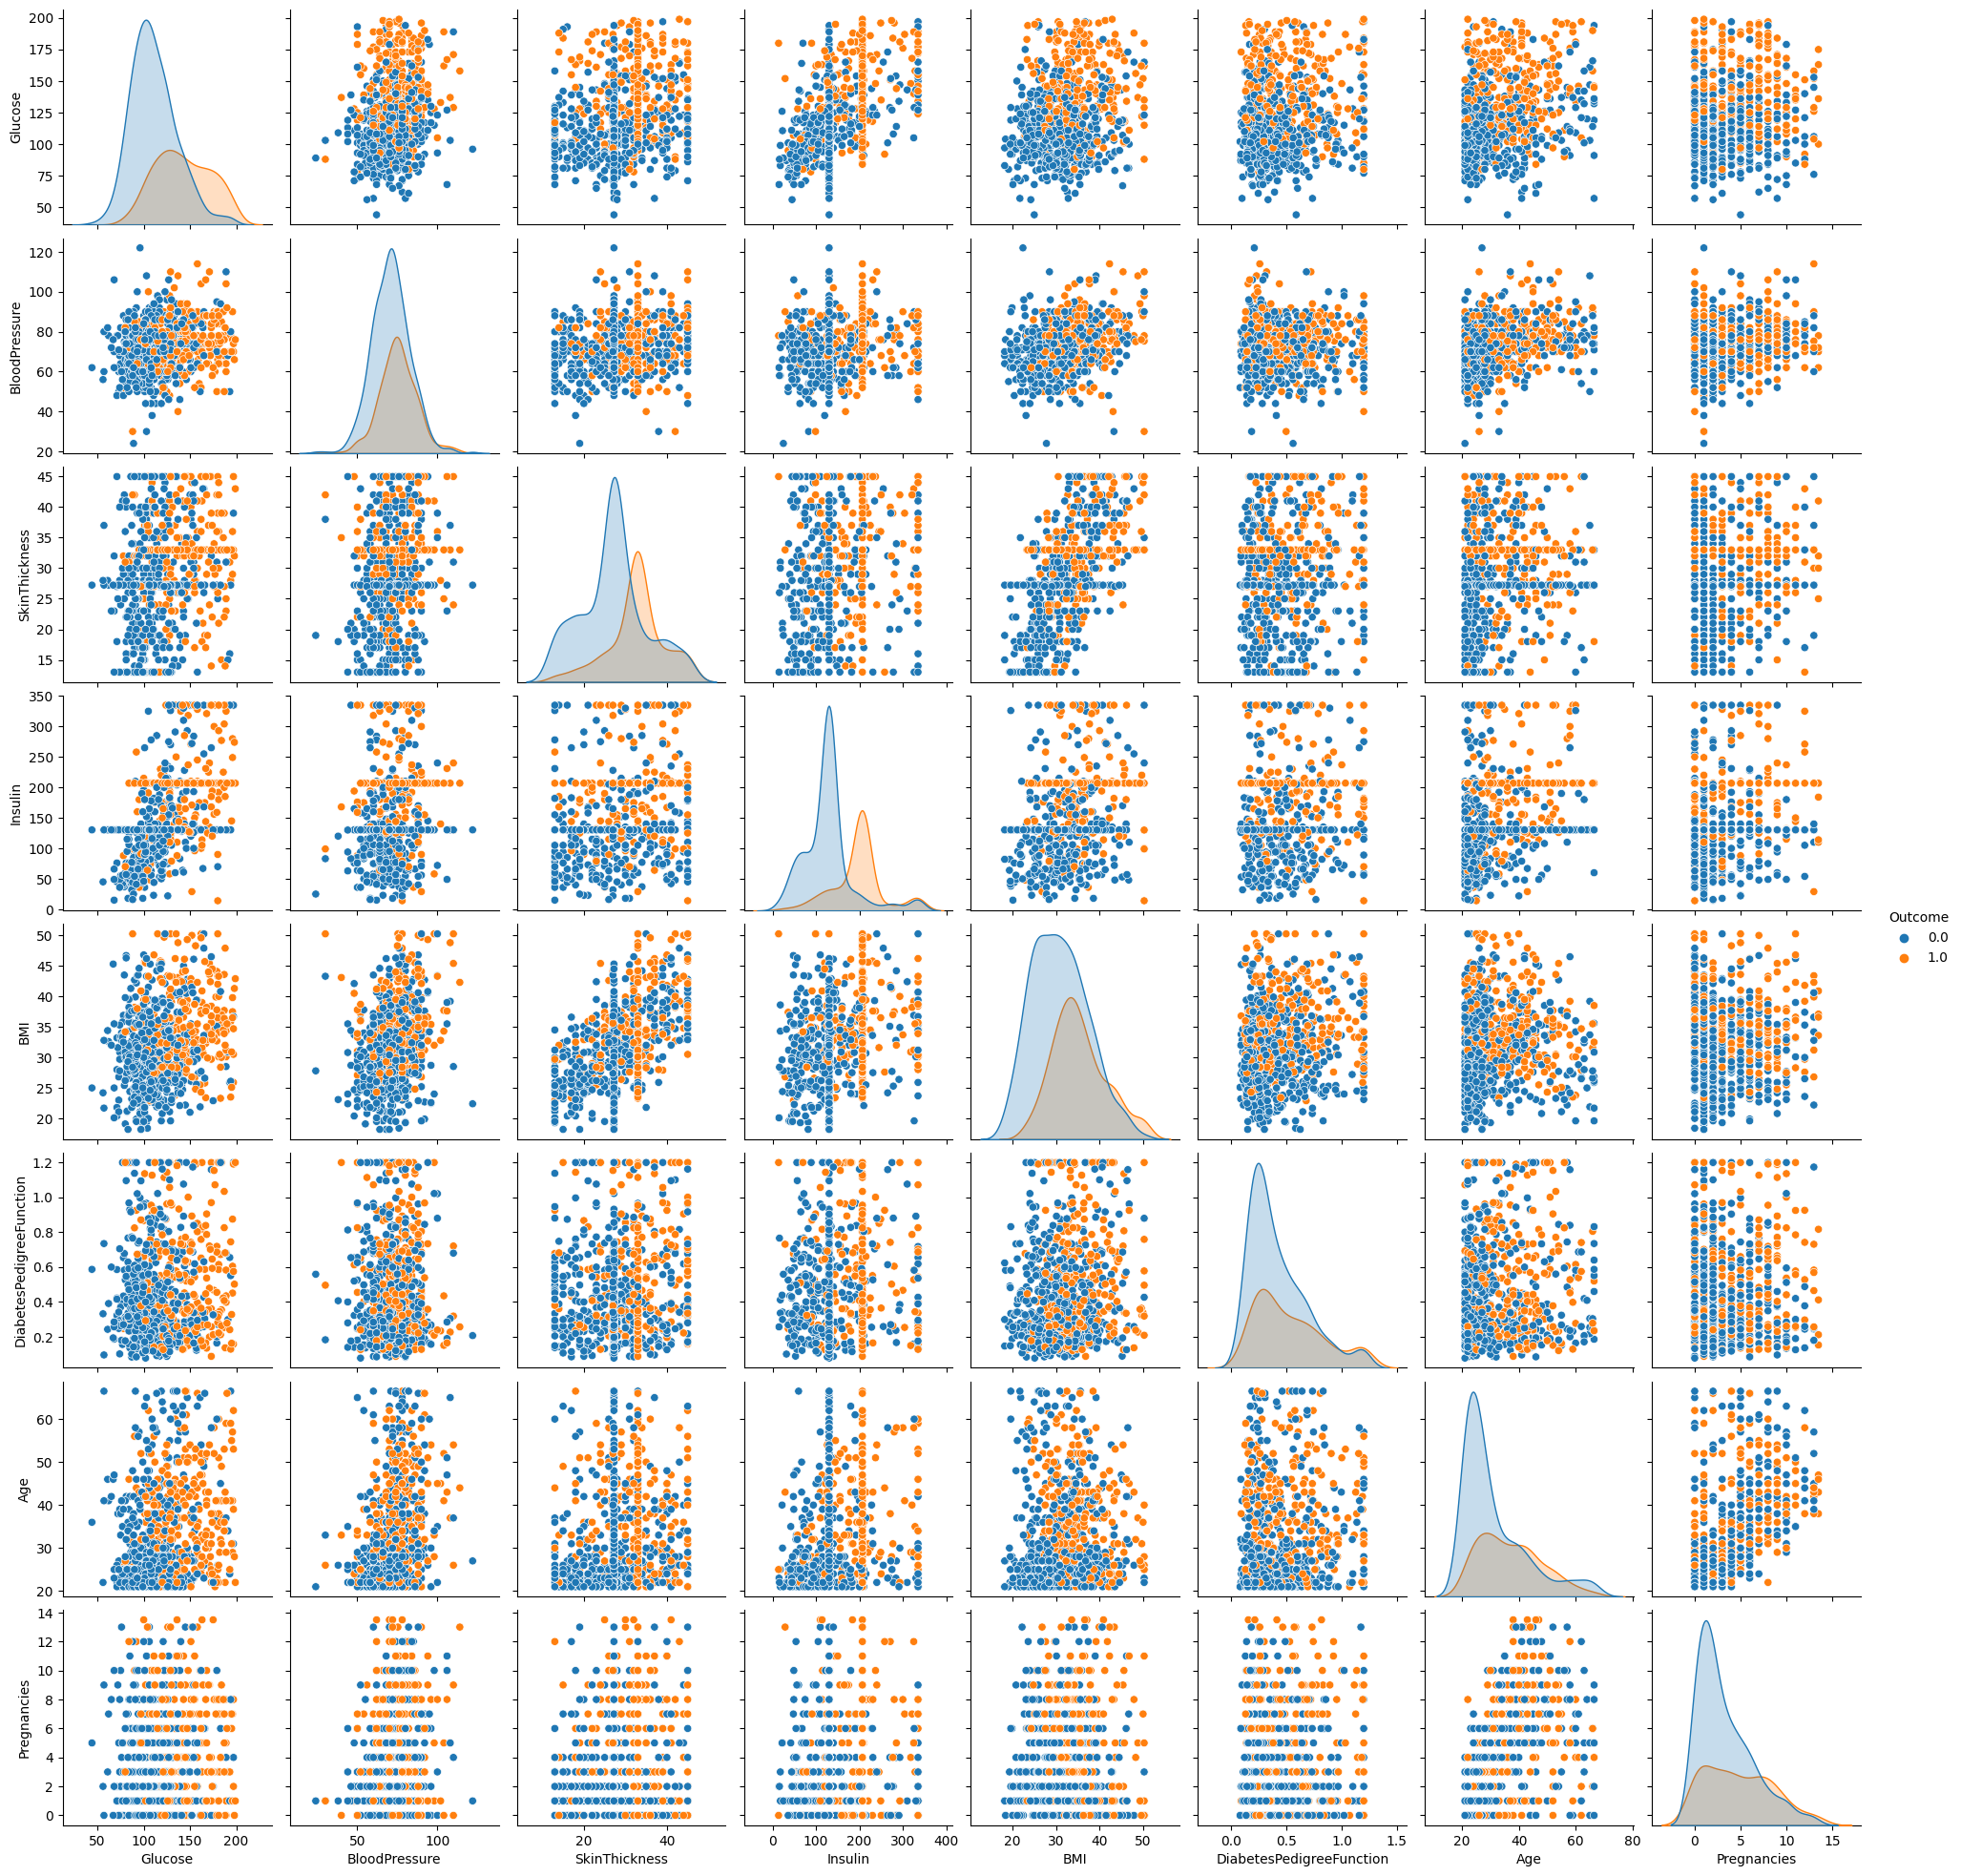

In [ ]:
sns.pairplot(df,hue='Outcome')
# from pairplot we can understand that the data is not having multicollinearity

<Axes: >

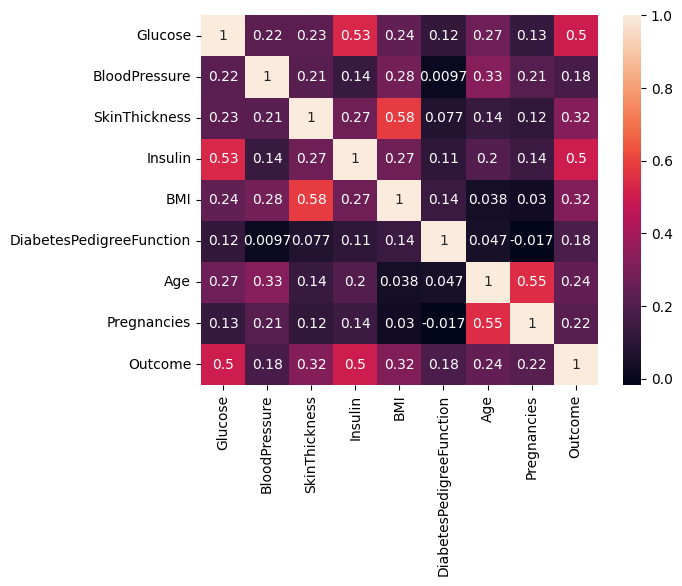

In [ ]:
# here used heatmap to analyze the correlation between the variables
sns.heatmap(df.corr(),annot=True)

# Train and Test Split



In [ ]:
# all the data preparation and visualization
# so we can continue with train_test_split
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
# creating x and y variables
x = df.drop(['Outcome',],axis=1)
y=df['Outcome']

In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=123)

In [ ]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)
# train and test datasets are successfully seperated

x_train:  (576, 8)
y_train:  (576,)
x_test:  (192, 8)
y_test:  (192,)


# Logistic Regression model

In [ ]:
# first we are gonna start with LogisticRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
# fitting the train data into the model and predicting 'y' variable
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(pred_ytrain_lr.shape)
print(pred_ytest_lr.shape)

(576,)
(192,)


In [ ]:
# user define function for the evaluation of model
def model_eval(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [ ]:
# model accuracy for train data
model_eval(y_train,pred_ytrain_lr)

The accuracy is  0.79
[[340  41]
 [ 80 115]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       381
         1.0       0.74      0.59      0.66       195

    accuracy                           0.79       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576



In [ ]:
# model accuracy for test data
model_eval(y_test,pred_ytest_lr)

The accuracy is  0.85
[[108  11]
 [ 18  55]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       119
         1.0       0.83      0.75      0.79        73

    accuracy                           0.85       192
   macro avg       0.85      0.83      0.84       192
weighted avg       0.85      0.85      0.85       192



**Analysis:**
 - Logistic Regression is a **High-Bias, High-Variance** model which is a
**bad** model

# Decision Tree Model

In [ ]:
#importing library for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# fitting the train data into the model and predicting 'y' variable
dtree = DecisionTreeClassifier(max_depth=2,min_samples_split=3)
dtree.fit(x_train,y_train)
pred_ytrain_dtree = dtree.predict(x_train)
pred_ytest_dtree = dtree.predict(x_test)

In [ ]:
print(pred_ytrain_dtree.shape)
print(pred_ytest_dtree.shape)

(576,)
(192,)


In [ ]:
# model accuracy for train data
model_eval(y_train,pred_ytrain_dtree)

The accuracy is  0.84
[[364  17]
 [ 73 122]]
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       381
         1.0       0.88      0.63      0.73       195

    accuracy                           0.84       576
   macro avg       0.86      0.79      0.81       576
weighted avg       0.85      0.84      0.84       576



In [ ]:
# model accuracy for test data
model_eval(y_test,pred_ytest_dtree)

The accuracy is  0.85
[[112   7]
 [ 21  52]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       119
         1.0       0.88      0.71      0.79        73

    accuracy                           0.85       192
   macro avg       0.86      0.83      0.84       192
weighted avg       0.86      0.85      0.85       192



**Analysis:**
 - DecisionTreeClassifier is a **High-Bias, Low-Variance** model which is a
**underfitting** model

# Random Forest model

In [ ]:
#importing library for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# fitting the train data into the model and predicting 'y' variable
rd = RandomForestClassifier(n_estimators=25,criterion='entropy',random_state=123)
rd.fit(x_train,y_train)
pred_ytrain_rd = rd.predict(x_train)
pred_ytest_rd = rd.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,pred_ytrain_rd)

The accuracy is  1.0
[[381   0]
 [  1 194]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       381
         1.0       1.00      0.99      1.00       195

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
# model accuracy for test data
  model_eval(y_test,pred_ytest_rd)

The accuracy is  0.91
[[110   9]
 [  9  64]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       119
         1.0       0.88      0.88      0.88        73

    accuracy                           0.91       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.91      0.91      0.91       192



**Analysis:**
 - RandomForestClassifier is a **Low-Bias, High-Variance** model which is a
**overfitting** model

# AdaBoost Model


In [ ]:
#importing library for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# fitting the train data into the model and predicting 'y' variable
ada = AdaBoostClassifier(n_estimators=100,random_state=123)
ada.fit(x_train,y_train)
pred_ytrain_ada = ada.predict(x_train)
pred_ytest_ada = ada.predict(x_test)

In [ ]:
# model accuracy for train data
  model_eval(y_train,pred_ytrain_ada)

The accuracy is  0.95
[[369  12]
 [ 16 179]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       381
         1.0       0.94      0.92      0.93       195

    accuracy                           0.95       576
   macro avg       0.95      0.94      0.95       576
weighted avg       0.95      0.95      0.95       576



In [ ]:
# model accuracy for test data
model_eval(y_test,pred_ytest_ada)

The accuracy is  0.91
[[111   8]
 [  9  64]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       119
         1.0       0.89      0.88      0.88        73

    accuracy                           0.91       192
   macro avg       0.91      0.90      0.91       192
weighted avg       0.91      0.91      0.91       192



**Analysis:**
 - AdaBoostClassifier is a **Low-Bias, Low-Variance** model which is a
**good** model

# Gradient Boosting Model

In [ ]:
#importing library for GradientBoostingClassifier
  from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# fitting the train data into the model and predicting 'y' variable
gb = GradientBoostingClassifier(max_depth=3,n_estimators=100,random_state=123,min_samples_split=2,learning_rate=1.0)
gb.fit(x_train,y_train)
pred_ytrain_gb = gb.predict(x_train)
pred_ytest_gb = gb.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,pred_ytrain_gb)

The accuracy is  1.0
[[381   0]
 [  0 195]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       381
         1.0       1.00      1.00      1.00       195

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [ ]:
# model accuracy for test data
model_eval(y_test,pred_ytest_gb)

The accuracy is  0.94
[[115   4]
 [  7  66]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       119
         1.0       0.94      0.90      0.92        73

    accuracy                           0.94       192
   macro avg       0.94      0.94      0.94       192
weighted avg       0.94      0.94      0.94       192



**Analysis:**
 - GradientBoostingClassifier is a **Low-Bias,Slightly Low-Variance** model which is a
**good** model

# KNN Model

In [ ]:
#importing library for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from math import sqrt

27.712812921102035

In [ ]:
# fitting the train data into the model and predicting 'y' variable
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
pred_knn_train = knn.predict(x_train)
pred_knn_test = knn.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,pred_knn_train)

The accuracy is  0.85
[[351  30]
 [ 55 140]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       381
         1.0       0.82      0.72      0.77       195

    accuracy                           0.85       576
   macro avg       0.84      0.82      0.83       576
weighted avg       0.85      0.85      0.85       576



In [ ]:
# model accuracy for test data
model_eval(y_test,pred_knn_test)

The accuracy is  0.88
[[105  14]
 [ 10  63]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       119
         1.0       0.82      0.86      0.84        73

    accuracy                           0.88       192
   macro avg       0.87      0.87      0.87       192
weighted avg       0.88      0.88      0.88       192



**Analysis:**
 - KNN is a **High-Bias, Low-Variance** model which is a
**underfitting** model

# XGBoost Model

In [ ]:
#importing library for XGBoost
import xgboost as xgb
dtest_clf = xgb.DMatrix(x_test, y_test)
dtrain_clf = xgb.DMatrix(x_train, y_train)

In [ ]:
from pandas.core.common import random_state
# fitting the train data into the model and predicting 'y' variable
xgb_classifier=xgb.XGBClassifier(n_estimators=35,random_state=123,max_depth=3)
xgb_classifier.fit(x_train,y_train)
xgb_pred_train=xgb_classifier.predict(x_train)
xgb_pred_test=xgb_classifier.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,xgb_pred_train)

The accuracy is  0.96
[[372   9]
 [ 14 181]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       381
         1.0       0.95      0.93      0.94       195

    accuracy                           0.96       576
   macro avg       0.96      0.95      0.96       576
weighted avg       0.96      0.96      0.96       576



In [ ]:
# model accuracy for test data
model_eval(y_test,xgb_pred_test)

The accuracy is  0.93
[[113   6]
 [  7  66]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       119
         1.0       0.92      0.90      0.91        73

    accuracy                           0.93       192
   macro avg       0.93      0.93      0.93       192
weighted avg       0.93      0.93      0.93       192



**Analysis:**
 - XgBoost is a **low-Bias, Low-Variance** model which is a
**good** model

# SVC Model

In [ ]:
# importing library for SVC
from sklearn.svm import SVC

In [ ]:
# fitting the train data into the model and predicting 'y' variable
svc = SVC(kernel = 'poly',degree=10)
svc.fit(x_train,y_train)
svc_preds_train = svc.predict(x_train)
svc_preds_test = svc.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,svc_preds_train)

The accuracy is  0.89
[[371  10]
 [ 55 140]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92       381
         1.0       0.93      0.72      0.81       195

    accuracy                           0.89       576
   macro avg       0.90      0.85      0.87       576
weighted avg       0.89      0.89      0.88       576



In [ ]:
# model accuracy for train data
model_eval(y_test,svc_preds_test)

The accuracy is  0.84
[[107  12]
 [ 19  54]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       119
         1.0       0.82      0.74      0.78        73

    accuracy                           0.84       192
   macro avg       0.83      0.82      0.83       192
weighted avg       0.84      0.84      0.84       192



**Analysis:**
 - SVC is a **High-Bias, Low-Variance** model which is a
**underfitting** model

# Balancing the dataset using SMOTE

In [ ]:
# importing library for SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE is to balance the data
oversample = SMOTE()

In [ ]:
# fitting the training data into SMOTE
x_smote,y_smote = oversample.fit_resample(x_train,y_train)

In [ ]:
print(x_smote.shape)
print(y_smote.shape)

(762, 8)
(762,)


In [ ]:
from collections import Counter

In [ ]:
counter = Counter(y_smote)
print(counter)

Counter({1.0: 381, 0.0: 381})


In [ ]:
 x_train_smote,x_test_smote,y_train_smote,y_test_smote = train_test_split(x_smote,y_smote,test_size = 0.25,random_state=123)

In [ ]:
print(x_train_smote.shape)
print(y_train_smote.shape)
print(x_test_smote.shape)
print(y_test_smote.shape)

(571, 8)
(571,)
(191, 8)
(191,)


# SVC Model with SMOTE

In [ ]:
# fitting the train data into the model and predicting 'y' variable
svc = SVC()
svc.fit(x_train_smote,y_train_smote)
preds_smote_svc_train = svc.predict(x_train_smote)
preds_smote_svc_test = svc.predict(x_test_smote)

In [ ]:
# model accuracy for train data
model_eval(y_train_smote,preds_smote_svc_train )

The accuracy is  0.82
[[244  40]
 [ 63 224]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       284
         1.0       0.85      0.78      0.81       287

    accuracy                           0.82       571
   macro avg       0.82      0.82      0.82       571
weighted avg       0.82      0.82      0.82       571



In [ ]:
# model accuracy for test data
model_eval(y_test_smote,preds_smote_svc_test)

The accuracy is  0.81
[[81 16]
 [20 74]]
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        97
         1.0       0.82      0.79      0.80        94

    accuracy                           0.81       191
   macro avg       0.81      0.81      0.81       191
weighted avg       0.81      0.81      0.81       191



**Analysis:**
 - SVC is a **High-Bias, Low-Variance** model which is a
**underfitting** model

# Gradient Boosting Model with SMOTE

In [ ]:
#importing library for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# fitting the train data into the model and predicting 'y' variable
gb = GradientBoostingClassifier(max_depth=3,n_estimators=50,random_state=123,min_samples_split=2)
gb.fit(x_train_smote,y_train_smote)
pred_ytrain_gb_smote = gb.predict(x_train_smote)
pred_ytest_gb_smote = gb.predict(x_test_smote)

In [ ]:
# model accuracy for train data
model_eval(y_train_smote,pred_ytrain_gb_smote)

The accuracy is  0.95
[[266  18]
 [ 13 274]]
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       284
         1.0       0.94      0.95      0.95       287

    accuracy                           0.95       571
   macro avg       0.95      0.95      0.95       571
weighted avg       0.95      0.95      0.95       571



In [ ]:
# model accuracy for test data
model_eval(y_test_smote,pred_ytest_gb_smote)

The accuracy is  0.88
[[86 11]
 [12 82]]
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88        97
         1.0       0.88      0.87      0.88        94

    accuracy                           0.88       191
   macro avg       0.88      0.88      0.88       191
weighted avg       0.88      0.88      0.88       191



**Analysis:**
 - Gradiant Boosting is a **Low-Bias, High-Variance** model which is a
**overfitting** model

# Naive Bayes Model

In [ ]:
# import library for naive bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
# fitting the train data into the model
gNb = GaussianNB()
gNb.fit(x_train_smote,y_train_smote)

GaussianNB()

In [ ]:
# predicting 'y' variable
preds_smote_gNb_train = gNb.predict(x_train_smote)
preds_smotte_gNb_test = gNb.predict(x_test_smote)

In [ ]:
# model accuracy for train data
model_eval(y_train_smote,preds_smote_gNb_train)

The accuracy is  0.8
[[229  55]
 [ 61 226]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       284
         1.0       0.80      0.79      0.80       287

    accuracy                           0.80       571
   macro avg       0.80      0.80      0.80       571
weighted avg       0.80      0.80      0.80       571



In [ ]:
# model accuracy for test data
model_eval(y_test_smote,preds_smotte_gNb_test)

The accuracy is  0.79
[[76 21]
 [20 74]]
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79        97
         1.0       0.78      0.79      0.78        94

    accuracy                           0.79       191
   macro avg       0.79      0.79      0.79       191
weighted avg       0.79      0.79      0.79       191



**Analysis:**
 - Naive Bayes is a **High-Bias, High-Variance** model which is a
**bad** model

# Naive Bayes Model Without SMOTE

In [ ]:
# fitting the train data into the model

gNb.fit(x_train,y_train)

GaussianNB()

In [ ]:
# predicting 'y' variable
preds__gNb_train = gNb.predict(x_train)
preds__gNb_test = gNb.predict(x_test)

In [ ]:
# model accuracy for train data
model_eval(y_train,preds__gNb_train)

The accuracy is  0.79
[[325  56]
 [ 64 131]]
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       381
         1.0       0.70      0.67      0.69       195

    accuracy                           0.79       576
   macro avg       0.77      0.76      0.77       576
weighted avg       0.79      0.79      0.79       576



In [ ]:
# model accuracy for test data
model_eval(y_test,preds__gNb_test)

The accuracy is  0.84
[[101  18]
 [ 12  61]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       119
         1.0       0.77      0.84      0.80        73

    accuracy                           0.84       192
   macro avg       0.83      0.84      0.84       192
weighted avg       0.85      0.84      0.84       192



**Analysis:**
 - Naive Bayes without SMOTE is a **High-Bias, Low-Variance** model which is a
**underfitting** model

**Overall Analysis:**
      There are two models which are good models.
they are,


1. GradientBoostingClassifier: 100% accuracy in train data and 6% variance with the test data

        
2. AdaBoostClassifier: 95% accuracy in train data and 4% variance with the test data


3.  xgboost: 96% accuracy in train data and 3% variance with the test data




      

# Creating a **app** for prediction

In [ ]:
%pip install Gradio

In [ ]:
import pickle
import gradio as gr

In [ ]:
with open('xgb_model.pkl','wb') as f:
    pickle.dump(ada,f)

In [ ]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Outcome'],
      dtype='object')

In [ ]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies'],
      dtype='object')

In [ ]:
def make_prediction(Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies):
    with open('xgb_model.pkl','rb') as f:
        clf=pickle.load(f)
        pred=clf.predict([[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies]])
        if pred==0:
            return 'No Diabetes'
        else:
            return 'Diabetes Patient'

In [ ]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.697358,72.428141,29.071261,151.514419,32.384571,0.458914,33.199870,3.837240,0.348958
std,30.462008,12.106044,7.989309,67.470301,6.671300,0.285596,11.628404,3.344157,0.476951
min,44.000000,24.000000,13.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.000000,0.000000
50%,117.000000,72.000000,28.000000,130.287879,32.050000,0.372500,29.000000,3.000000,0.000000
75%,141.000000,80.000000,33.000000,206.846154,36.600000,0.626250,41.000000,6.000000,1.000000
max,199.000000,122.000000,45.000000,334.865385,50.250000,1.200000,66.500000,13.500000,1.000000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [ ]:
Glucose=gr.Number(label='Enter Glucose(40-200)')
BloodPressure=gr.Number(label='Enter BloodPressure(20-130)')
SkinThickness=gr.Number(label='Enter front SkinThickness(10-50)')
Insulin=gr.Number(label='Enter Insulin(10-350)')
BMI=gr.Number(label='Enter BMI(10-55)')
DiabetesPedigreeFunction=gr.Number(label='Enter DiabetesPedigreeFunction(0.05-1.5)')
Age=gr.Number(label='Enter Age(18-80)')
Pregnancies=gr.Number(label='Enter Pregnancies(0-17)')
output=gr.Textbox()

In [ ]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,206.846154,33.6,0.627,50.0,6.0,1.0
1,85.0,66.0,29.0,130.287879,26.6,0.351,31.0,1.0,0.0
2,183.0,64.0,33.0,206.846154,23.3,0.672,32.0,8.0,1.0
3,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,1.0,0.0
4,137.0,40.0,35.0,168.000000,43.1,1.200,33.0,0.0,1.0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    float64
 1   BloodPressure             768 non-null    float64
 2   SkinThickness             768 non-null    float64
 3   Insulin                   768 non-null    float64
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    float64
 7   Pregnancies               768 non-null    float64
dtypes: float64(8)
memory usage: 48.1 KB


In [ ]:
df.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
763,101.0,76.0,45.0,180.000000,32.9,0.171,63.0,10.0,0.0
764,122.0,70.0,27.0,130.287879,36.8,0.340,27.0,2.0,0.0
765,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,5.0,0.0
766,126.0,60.0,33.0,206.846154,30.1,0.349,47.0,1.0,1.0
767,93.0,70.0,31.0,130.287879,30.4,0.315,23.0,1.0,0.0


In [ ]:
app=gr.Interface(fn=make_prediction,inputs=[Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies],outputs=output)
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e2c63ebce5e9653a0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
